## Data Science And Business Analytics Internship At The Sparks Foundation.

#GRIPJUNE21

Author : Naganandan P

#Task-2
Prediction using Unsupervised ML.
Problem statement : From the given ‘Iris’ dataset, predict the optimum number of clusters.
and represent it visually..

Link to Dataset:https://bit.ly/3kXTdox

In [36]:
#Importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [60]:
dt=pd.read_csv('iris.csv')          #Reading the dataset using pandas

In [61]:
dt.shape                           #Gives the number of rows and columns

(150, 6)

In [62]:
dt.head(2)                         #Display first two rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [63]:
dt.dtypes                  #Display the data types of the attribute in the data set

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [64]:
dt.duplicated().sum()     #chechking whether dataset is having any null values or not

0

In [65]:
dt.isnull().sum()         

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
dt.info()             #information about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
dt.describe(include='all')             #Description of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [53]:
dt['Species'].value_counts().to_frame()    #Unique value with frequencies in Species

,Species
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,50


Text(0.5, 1.0, 'Data visualization of every feature pair of data')

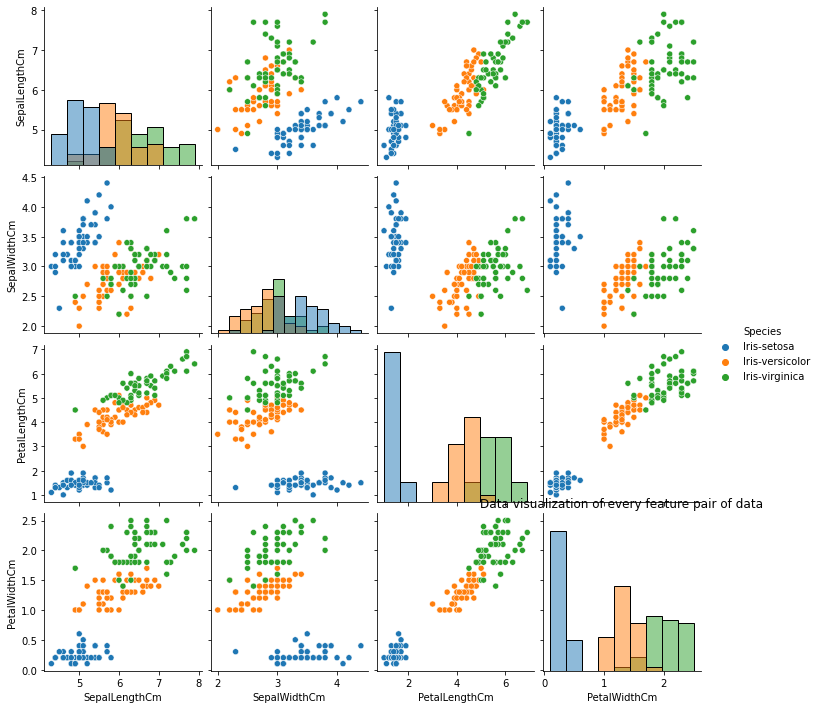

In [56]:
sns.pairplot(dt,hue='Species',diag_kind='hist')                 #visulaization of the dataset
plt.title('Data visualization of every feature pair of data')

In [33]:
dt.drop('Id',axis=1,inplace=True)  #drop the column 'Id' which is not required
dt.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


# Model Development

### Uses the KMEANS Unsupervised Alogirthm to find out the suitable number of cluster required.

In [57]:
x=dt.iloc[:, [0,1,2,3]].values
x[0:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


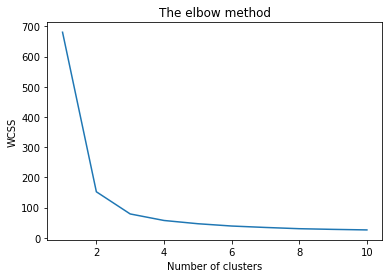

In [58]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',
             max_iter = 300,n_init = 10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [46]:
#Now applying the KMEANS to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

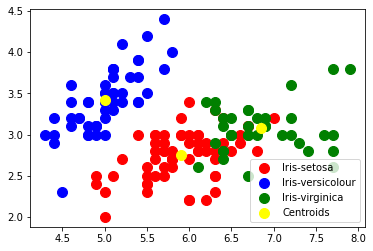

In [47]:
#Visualising the cluster on the first two columns
#ploating the centroid of the clusters


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### 